# Electrical Failure Data

Prashant Brahmbhatt

_______

Importing libraries

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')

Importing the dataset

In [3]:
data = pd.read_csv('electric_data.csv')
data.head(12)

,date_of_trip,time_of_trip,weather,other_circuit,line_trip,load_of_line,voltage,frequency,other_line_status,date of restoration,time_of_restoration,observation,repair_carried,tripping_reason
0,08-11-2017,05:39,cloudy,healthy,yes,71,237,49.87,NaN,08-11-2017,07:50,NaN,nil,bad weather
1,10-05-2017,15:56,cloudy,healthy,yes,187,220,49.98,NaN,10-05-2017,16:34,NaN,nil,transient fault
2,11-10-2017,12:35,clear,healthy,yes,124,229,49.94,NaN,11-10-2017,13:45,NaN,nil,foreign element
3,18-06-2017,05:37,clear,healthy,yes,105,228,50.01,NaN,18-06-2017,06:17,NaN,nil,foreign element
4,19-06-2017,06:30,rainy,healthy,yes,102,229,50.05,NaN,19-06-2017,07:18,disc puncture,feeder isolated,transient fault
5,20-06-2017,17:04,cloudy,healthy,no,137,221,50.03,NaN,20-06-2017,17:10,relay burnt,relay removed,relay burn
6,24-07-2017,11:32,cloudy,healthy,yes,173,220,49.98,NaN,24-07-2017,12:07,NaN,nil,transient fault
7,29-06-2017,13:51,cloudy,healthy,yes,180,227,50.03,NaN,29-06-2017,14:39,NaN,nil,foreign element
8,31-12-2017,07:38,foggy,healthy,yes,67,235,50.06,NaN,31-12-2017,09:26,NaN,nil,bad weather
9,11-06-2017,03:49,clear,healthy,no,146,232,50.01,NaN,11-06-2017,04:20,NaN,fuse,fuse failure


#### Checking for Missing Values

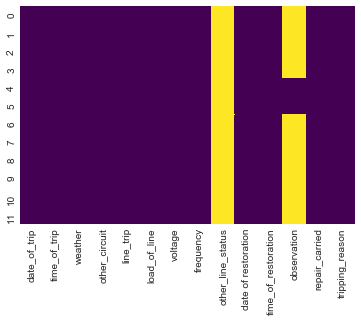

In [4]:
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')

The **other_line_status** and **observation** column is all or mostly **NaN** so we can drop it

In [5]:
data.drop('other_line_status', inplace = True, axis  =1)

## EDA

Separating the **years**, **months** and **hours** from the date and time

In [6]:
#Separating year
data['trip_year'] = data['date_of_trip'].apply(lambda x: x.split('-')[2])
data['restore_year'] = data['date of restoration'].apply(lambda x: x.split('-')[2])

#Separating month
data['trip_month'] = data['date_of_trip'].apply(lambda x: x.split('-')[1])
data['restore_month'] = data['date of restoration'].apply(lambda x: x.split('-')[1])


#separating hours
data['trip_hour'] = data['time_of_trip'].apply(lambda x: x.split(':')[0])
data['restore_hour'] = data['time_of_restoration'].apply(lambda x: x.split(':')[0])

In [7]:
#dropping the columns
#data.drop(labels = ['date_of_trip','date of restoration','time_of_trip','time_of_restoration'], inplace = True, axis = 1)

In [8]:
data.head()

,date_of_trip,time_of_trip,weather,other_circuit,line_trip,load_of_line,voltage,frequency,date of restoration,time_of_restoration,observation,repair_carried,tripping_reason,trip_year,restore_year,trip_month,restore_month,trip_hour,restore_hour
0,08-11-2017,05:39,cloudy,healthy,yes,71,237,49.87,08-11-2017,07:50,NaN,nil,bad weather,2017,2017,11,11,05,07
1,10-05-2017,15:56,cloudy,healthy,yes,187,220,49.98,10-05-2017,16:34,NaN,nil,transient fault,2017,2017,05,05,15,16
2,11-10-2017,12:35,clear,healthy,yes,124,229,49.94,11-10-2017,13:45,NaN,nil,foreign element,2017,2017,10,10,12,13
3,18-06-2017,05:37,clear,healthy,yes,105,228,50.01,18-06-2017,06:17,NaN,nil,foreign element,2017,2017,06,06,05,06
4,19-06-2017,06:30,rainy,healthy,yes,102,229,50.05,19-06-2017,07:18,disc puncture,feeder isolated,transient fault,2017,2017,06,06,06,07


Converting the datatype from object to integers

In [9]:
#Convertig datatypes to integer
data['trip_month'] = data['trip_month'].astype(int)
data['trip_hour'] = data['trip_hour'].astype(int)
data['trip_year'] = data['trip_year'].astype(int)
data['restore_hour'] = data['restore_hour'].astype(int)
data['restore_year'] = data['restore_year'].astype(int)
data['restore_month'] = data['restore_month'].astype(int)

In [10]:
data.head()

,date_of_trip,time_of_trip,weather,other_circuit,line_trip,load_of_line,voltage,frequency,date of restoration,time_of_restoration,observation,repair_carried,tripping_reason,trip_year,restore_year,trip_month,restore_month,trip_hour,restore_hour
0,08-11-2017,05:39,cloudy,healthy,yes,71,237,49.87,08-11-2017,07:50,NaN,nil,bad weather,2017,2017,11,11,5,7
1,10-05-2017,15:56,cloudy,healthy,yes,187,220,49.98,10-05-2017,16:34,NaN,nil,transient fault,2017,2017,5,5,15,16
2,11-10-2017,12:35,clear,healthy,yes,124,229,49.94,11-10-2017,13:45,NaN,nil,foreign element,2017,2017,10,10,12,13
3,18-06-2017,05:37,clear,healthy,yes,105,228,50.01,18-06-2017,06:17,NaN,nil,foreign element,2017,2017,6,6,5,6
4,19-06-2017,06:30,rainy,healthy,yes,102,229,50.05,19-06-2017,07:18,disc puncture,feeder isolated,transient fault,2017,2017,6,6,6,7


Mapping the integer **month** values to names

In [11]:
#Mapping the months
data['trip_month'] = data['trip_month'].map({1:'January', 2:'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
                               8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

data['restore_month'] = data['trip_month'].map({1:'January', 2:'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
                               8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})


In [12]:
data.head()

,date_of_trip,time_of_trip,weather,other_circuit,line_trip,load_of_line,voltage,frequency,date of restoration,time_of_restoration,observation,repair_carried,tripping_reason,trip_year,restore_year,trip_month,restore_month,trip_hour,restore_hour
0,08-11-2017,05:39,cloudy,healthy,yes,71,237,49.87,08-11-2017,07:50,NaN,nil,bad weather,2017,2017,November,NaN,5,7
1,10-05-2017,15:56,cloudy,healthy,yes,187,220,49.98,10-05-2017,16:34,NaN,nil,transient fault,2017,2017,May,NaN,15,16
2,11-10-2017,12:35,clear,healthy,yes,124,229,49.94,11-10-2017,13:45,NaN,nil,foreign element,2017,2017,October,NaN,12,13
3,18-06-2017,05:37,clear,healthy,yes,105,228,50.01,18-06-2017,06:17,NaN,nil,foreign element,2017,2017,June,NaN,5,6
4,19-06-2017,06:30,rainy,healthy,yes,102,229,50.05,19-06-2017,07:18,disc puncture,feeder isolated,transient fault,2017,2017,June,NaN,6,7


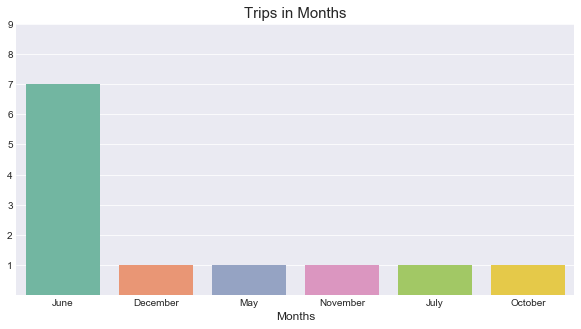

In [13]:
temp = data['trip_month'].value_counts()

plt.figure(figsize= (10,5))
plt.title('Trips in Months',fontsize = 15)
sns.barplot(x = temp.index, y = temp.values, palette = 'Set2')
plt.xlabel('Months', fontsize = 12)
plt.yticks([1,2,3,4,5,6,7,8,9])
plt.show()

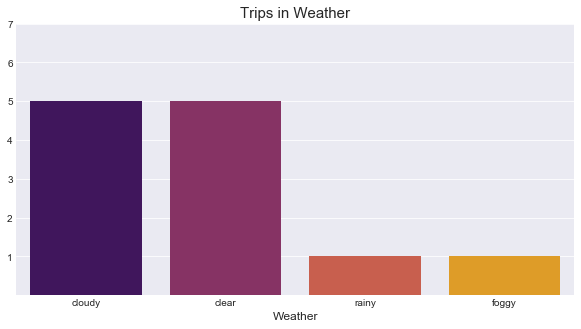

In [14]:
temp = data['weather'].value_counts()

plt.figure(figsize= (10,5))
plt.title('Trips in Weather',fontsize = 15)
sns.barplot(x = temp.index, y = temp.values, palette = 'inferno')
plt.xlabel('Weather', fontsize = 12)
plt.yticks([1,2,3,4,5,6,7])
plt.show()

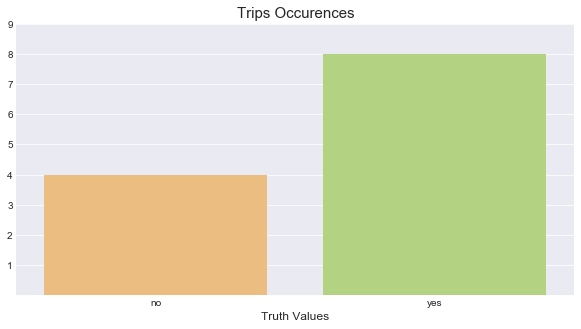

In [18]:
temp = data['line_trip'].value_counts()
plt.figure(figsize= (10,5))
plt.title('Trips Occurences',fontsize = 15)
sns.barplot(x = temp.index[::-1], y = temp.values[::-1], palette = 'RdYlGn')
plt.xlabel('Truth Values', fontsize = 12)
plt.yticks(list(range(1,10)))
plt.show()

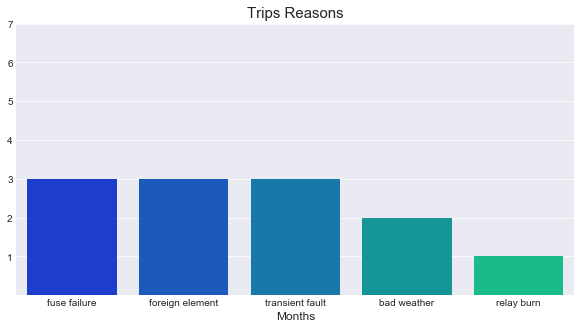

In [15]:
temp = data['tripping_reason'].value_counts()

plt.figure(figsize= (10,5))
plt.title('Trips Reasons',fontsize = 15)
sns.barplot(x = temp.index, y = temp.values, palette = 'winter')
plt.xlabel('Months', fontsize = 12)
plt.yticks([1,2,3,4,5,6,7])
plt.show()

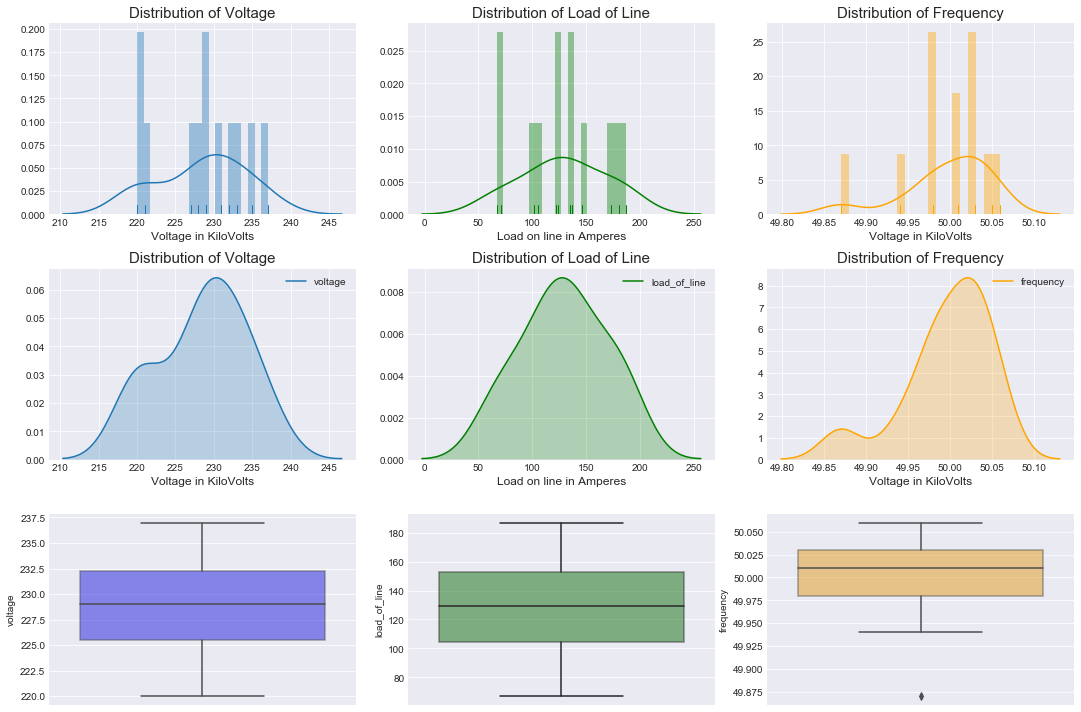

In [16]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)

#Histograms
plt.subplot(3,3,1)
sns.distplot(data['voltage'], bins = 20, rug = True)
plt.xlabel('Voltage in KiloVolts', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(data['load_of_line'], bins = 20, color= 'green',rug = True)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)

plt.subplot(3,3,3)
sns.distplot(data['frequency'], bins = 20, rug= True, color= 'orange')
plt.xlabel('Voltage in KiloVolts', fontsize = 12)
plt.title('Distribution of Frequency',fontsize = 15)

#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(data['voltage'], shade = True)
plt.xlabel('Voltage in KiloVolts', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(data['load_of_line'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)

plt.subplot(3,3,6)
sns.kdeplot(data['frequency'],shade= True, color = 'Orange')
plt.xlabel('Voltage in KiloVolts', fontsize = 12)
plt.title('Distribution of Frequency',fontsize = 15)

#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = data['voltage'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = data['load_of_line'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))
plt.subplot(3,3,9)
sns.boxplot(x = data['frequency'], orient = 'v', color= 'Orange', boxprops=dict(alpha=.5))

plt.tight_layout()
plt.show()

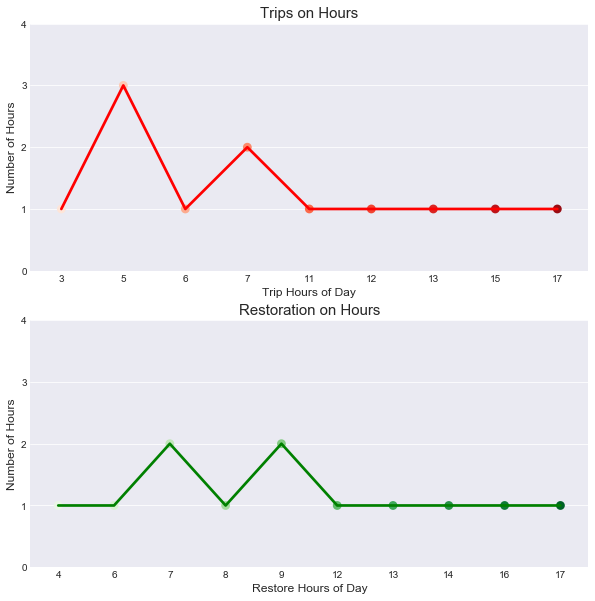

In [17]:
temp = data['trip_hour'].value_counts()
plt.figure(figsize= (10,10))

plt.subplot(2,1,1)
sns.pointplot(x = temp.index, y = temp.values ,palette= 'Reds')
sns.pointplot(x = temp.index, y = temp.values ,join= True, color = 'r',markers = '')
plt.title('Trips on Hours',fontsize = 15)
plt.xlabel('Trip Hours of Day', fontsize = 12)
plt.ylabel('Number of Hours', fontsize = 12)
plt.yticks([0,1,2,3,4])

temp = data['restore_hour'].value_counts()
plt.subplot(2,1,2)
sns.pointplot(x = temp.index, y = temp.values ,palette= 'Greens')
sns.pointplot(x = temp.index, y = temp.values ,join= True, color='g', markers = '')
plt.title('Restoration on Hours',fontsize = 15)
plt.xlabel('Restore Hours of Day', fontsize = 12)
plt.ylabel('Number of Hours', fontsize = 12)
plt.yticks([0,1,2,3,4])
plt.show()

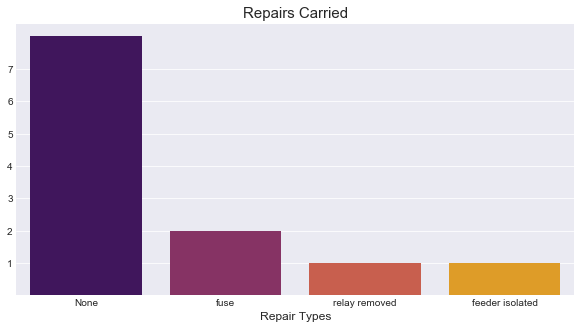

In [22]:
for i in range(0,len(data['repair_carried'])):
    if data['repair_carried'][i] == 'nil':
        data['repair_carried'][i] = 'None'
temp = data['repair_carried'].value_counts()
plt.figure(figsize= (10,5))
plt.title('Repairs Carried',fontsize = 15)
sns.barplot(x = temp.index, y = temp.values, palette = 'inferno')
plt.xlabel('Repair Types', fontsize = 12)
plt.yticks([1,2,3,4,5,6,7])
plt.show()